# DQLab Sport Center Data Analysis

In [1]:
#Importing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

## EDA (Exploratory Data Analysis)

In [2]:
#Read the data as pandas data frame
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/data_retail.csv', sep=';')

#Returns shape of the data(Row x Column)
print(data.shape)

#Returns the first 5 number of rows
print(data.head())

#Returns information about all columns
print(data.info())

(100000, 8)
   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0

Berdasarkan output diatas, terlihat bahwa data terdiri dari 100000 baris dan 8 kolom dengan tipe data int64 dan object. Selanjutnya ubahlah tipe data kolom First_Transaction dan Last_Transaction menjadi tipe data datetime.

In [3]:
#Changing the data type of  First_Transaction and Last_Transaction columns
data['First_Transaction'] = pd.to_datetime(data['First_Transaction']/1000, unit='s', origin='1970-01-01')
data['Last_Transaction'] = pd.to_datetime(data['Last_Transaction']/1000, unit='s', origin='1970-01-01')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB


In [4]:
#Remove unnecessary columns
data.drop(['no','Row_Num'], axis=1, inplace=True)
print(data.head())


   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  Count_Transaction  
0 2018-10-05 05:48:02.608000040                     1467681                 22  
1 2018-12-25 11:02:41.269999981                     1269337                 41  
2 2019-01-24 09:40:02.000000000                      310915                 30  
3 2019-01-16 13:00:03.911000013                      722632                 27  
4 2018-11-22 12:53:41.529999970                     1775036                 25  


In [5]:
print(data.shape)

(100000, 6)


Setelah menghapus kolom (no, Row_Num) yang tidak digunakan, langkah selanjutnya adalah mengklasifikasikan customer yang berstatus churn atau tidak dengan boolean.

In [6]:
# Checking the last transaction in the dataset
print(max(data['Last_Transaction'])) #check the last transaction in the dataset

#Classifying churn customers with boolean
data.loc[data['Last_Transaction'] <= '2018-08-01', 'is_churn'] =  True 
data.loc[data['Last_Transaction'] > '2018-08-01', 'is_churn'] =  False 
print(data.head())

2019-02-01 23:57:57.286000013
   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.395999908   
1        29531  Sepatu 2014-07-23 01:02:11.493999958   
2       141526     Tas 2017-04-28 03:12:27.000000000   
3       141526   Jaket 2017-04-28 06:52:52.546999931   
4        37545  Sepatu 2015-04-16 10:01:38.530999899   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000040                     1467681   
1 2018-12-25 11:02:41.269999981                     1269337   
2 2019-01-24 09:40:02.000000000                      310915   
3 2019-01-16 13:00:03.911000013                      722632   
4 2018-11-22 12:53:41.529999970                     1775036   

   Count_Transaction is_churn  
0                 22    False  
1                 41    False  
2                 30    False  
3                 27    False  
4                 25    False  


In [7]:
#Create Year_First_Transaction & Year_Last_Transaction Column
data['Year_First_Transaction'] = data['First_Transaction'].dt.year 
data['Year_Last_Transaction'] = data['Last_Transaction'].dt.year 
data.columns

Index(['Customer_ID', 'Product', 'First_Transaction', 'Last_Transaction',
       'Average_Transaction_Amount', 'Count_Transaction', 'is_churn',
       'Year_First_Transaction', 'Year_Last_Transaction'],
      dtype='object')

### Visualization of Customer Acquisition Trends by Year
Melakukan visualisasi terhadap jumlah distribusi pelanggan setiap tahun.

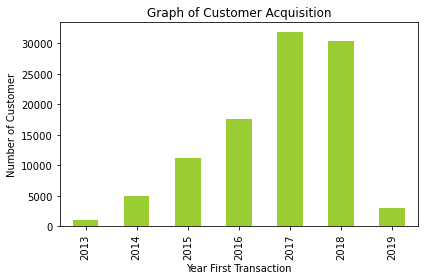

In [8]:
#Visualization of Customer Acquisition Trends by Year
data_customer_acquisition = data.groupby(['Year_First_Transaction'])['Customer_ID'].count()
data_customer_acquisition.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar',color='yellowgreen', title='Graph of Customer Acquisition')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

Dari diagram diatas terlihat bahwa jumlah customer yang melakukan transaksi paling banyak adalah pada tahun 2017. Diagram juga menunjukkan bahwa bisnis ini memiliki pertumbuhan yang cukup baik yang dibuktikan dari peningkatan jumlah customer selang tahun 2013 - 2017. Penurunan drastis dari jumlah customer terjadi pada selang tahun 2018 - 2019. 

### Visualization of Total Transactions by Year
Melakukan visualisasi terhadap jumlah transaksi yang dilakukan pelanggan setiap tahun.

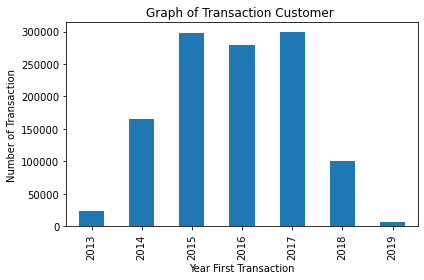

In [9]:
#Visualization of Total Transactions by Year
data_transaction = data.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
data_transaction.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer ')
plt.xlabel('Year First Transaction')
plt.ylabel('Number of Transaction')
plt.tight_layout()
plt.show()

Dari diagram diatas terlihat bahwa terjadinya peningkatan jumlah transaksi dari tahun 2013-2015, dan mengalami sedikit penurunan terhadap jumlah transaksi yang dilakuakan customer pada tahun 2016. Transaksi mengalami kenaikan kembali pada tahun 2017, namun mengalami penurunan drastis pada tahun 2018-2019.

### Visualization of the Average Transactions by Year for Each Product
Visualisasi rata-rata transaksi pada tiap produk.

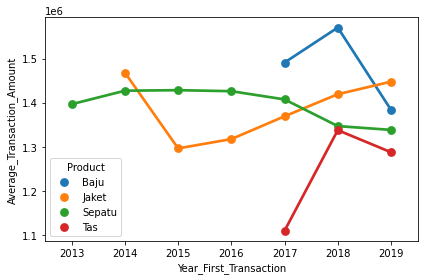

In [10]:
#Visualization of the Average Transactions by Year for Each Product
sns.pointplot(data=data.groupby(['Product','Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction',
y='Average_Transaction_Amount',
hue='Product')
plt.tight_layout()
plt.show()

Perbandingan transaksi tiap produk dari tahun 2013-2019 dapat dilihat dari diagram garis diatas. Berdasarkan diagram tersebut, sepatu merupakan produk yang memiliki rata - rata penjualan paling stabil dari produk lain setiap tahunnnya. Hal ini dapat terlihat dari rata - rata jumlah penjualan sepatu yang tidak berubah secara signifikan. Sedangkan jaket memiliki rata-rata penjualan tinggi pada tahun 2014 namun turun secara drastis pada tahun 2015 dan mulai naik Kembali pada tahun 2017–2019. Produk baju mmengalami penjualan cukup baik di tahun 2017-2018, namun mengalami penurunan yang cukup drastis pada tahun 2019. Produk tas mengalami kenaikan penjualan produk yang drastis dari tahun 2017-2018, dan mengalami sedikit penurunan di tahun 2019. 

### Proportion Churn by produt
Visualisasi proporsi churn berdasarkan produk.

In [11]:
#Pivot data
data_piv=data.pivot_table(index='is_churn',
columns= 'Product', 
values='Customer_ID',
aggfunc='count',
fill_value=0)

In [12]:
#Get the proportion Churn by product
plot_product = data_piv.count().sort_values(ascending=False).head(5).index

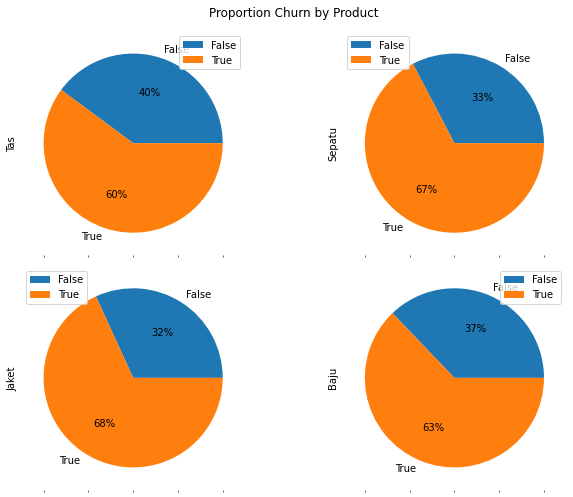

In [13]:
#Plot Pie Chart
data_piv=data_piv.reindex(columns=plot_product)
data_piv.plot.pie(subplots=True,
                  figsize=(10,7),
                  layout=(-1,2),
                  autopct='%.0f%%',
                  title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

Berdasarkan pie chart diatas, dapat dilihat bahwa dari keempat produk yang dijual, rata-rata sekitar 35% pelanggan akan kembali membeli produk tersebut setelah pembelian pertama. Sehingga dapat dikatakan bahwa setiap produk yang dijual memiliki masing-masing penggemarnya yang melakukan pembelian kembali terhadap produk yang sama.

### Visualization of Customer Distribution by Count Transaction Group
Melakukan visualisasi terhadap distribusi pelanggan berdasarkan jumlah transaksi yang dilakukan.

In [14]:
# Count Transacton Group Classification
def func(row) :
    if row ['Count_Transaction'] <= 1:
        val ='1'
    elif row ['Count_Transaction'] > 1 and row ['Count_Transaction'] <=3 :
        val = '2-3'
    elif row ['Count_Transaction'] > 3 and row ['Count_Transaction'] <=6 :
        val = '4-6'
    elif row ['Count_Transaction'] > 7 and row ['Count_Transaction'] <=10:
        val ='7-10'
    else:
        val = '>10'
    
    return val

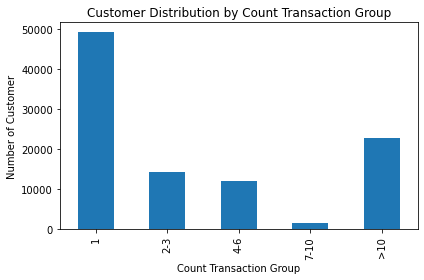

In [15]:
# Visualization of Customer Distributtion by Count Transaction Group
data['Count_Transaction_Group'] = data.apply(func, axis = 1) #Create Count_Transaction_Group Column

data_customer_by_counttransaction = data.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
data_customer_by_counttransaction.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count Transaction Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

Dari diagram diatas dapat dilihat bahwa mayoritas pelanggan hanya melakukan satu kali transaksi, namun jika ditotalkan jumlah pelanggan yang melakukan transaksi lebih dari sekali masih lebih banyak dari pada pelanggan yang melakukan satu kali transaksi saja.

### Visualization of Customer Distributtion by Average Transaction Amount Group
Melakukan visualisasi terhadap distribusi pelanggan berdasarkan total transaksi yang dilakukan.

In [16]:
# Average Transaction Amount Group Classification
def f(row):
    if row ['Average_Transaction_Amount'] >= 100000 and row ['Average_Transaction_Amount'] <=200000:
        val = '1. 100.000 - 250.000'
    elif row ['Average_Transaction_Amount'] >250000 and row ['Average_Transaction_Amount'] <=500000:
        val ='2. >250.000 - 500.000'
    elif row ['Average_Transaction_Amount'] >500000 and row ['Average_Transaction_Amount'] <=750000:
        val = '3. >500.000 - 750.000'
    elif row ['Average_Transaction_Amount'] >750000 and row ['Average_Transaction_Amount'] <=1000000:
        val ='4. >750.000 - 1.000.000'
    elif row ['Average_Transaction_Amount'] >1000000 and row ['Average_Transaction_Amount'] <=2500000:
        val = '5. >1.000.000 - 2.500.000'
    elif row ['Average_Transaction_Amount'] >2500000 and row ['Average_Transaction_Amount'] <=5000000:
        val ='6. >2.500.000 - 5.000.000'
    elif row ['Average_Transaction_Amount'] >5000000 and row ['Average_Transaction_Amount'] <=10000000:
        val ='7. >5.000.000 - 10.000.000'
  
    else:
        val = '8. >10.000.000'
        
    return val

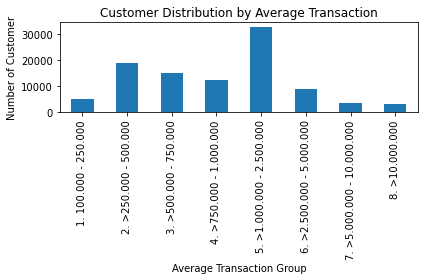

In [17]:
# Visualization of Customer Distributtion by Average Transaction Amount Group
data['Average_Transaction_Amount_Group']= data.apply(f,axis = 1) #Create Average_Transaction__Amount_Group Column

data_customer_by_averagetransaction = data.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
data_customer_by_averagetransaction.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction')
plt.xlabel('Average Transaction Group')
plt.ylabel('Number of Customer')
plt.tight_layout()
plt.show()

## Data Pre-Processing

###  Spliting Dataset
Dataset dibagi menjadi dua bagian untuk keperluan modelling (70% training dan 30% testing)

In [45]:
from sklearn.model_selection import train_test_split

data['Year_Diff']= data['Year_Last_Transaction'] - data['Year_First_Transaction'] #Create Year_Diff Column
feature_columns = ['Average_Transaction_Amount','Count_Transaction','Year_Diff' ]

#X as a predictor and y as a target
X=data[feature_columns]
y=data['is_churn']

y=y.astype('int')

#Splitting the dataset (70% Training and 30% Testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print('Jumlah baris dan kolom dari X_train :', X_train.shape)
print('Jumlah baris dan kolom dari y_train :', y_train.shape)

print('Persentase Churn di data training adalah :')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari X_test :', X_test.shape)
print('Jumlah baris dan kolom dari y_test :', y_test.shape)

print('Persentase Churn di data testing adalah :')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari X_train : (70000, 3)
Jumlah baris dan kolom dari y_train : (70000,)
Persentase Churn di data training adalah :
1    0.666714
0    0.333286
Name: is_churn, dtype: float64
Jumlah baris dan kolom dari X_test : (30000, 3)
Jumlah baris dan kolom dari y_test : (30000,)
Persentase Churn di data testing adalah :
1    0.6633
0    0.3367
Name: is_churn, dtype: float64


## Pemodelan Machine Learning

### Gradient Boosting Classifier
Gunakan GradientBoostingClassifier() untuk memanggil algoritma tersebut.

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#Konfiguration Model
gb_model =GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

##Prediction with Data Training
y_pred = gb_model.predict(X_test)

print('Classification Report training model (Gradient Boosting) :')
print(classification_report(y_test,y_pred))

Classification Report training model (Gradient Boosting) :
              precision    recall  f1-score   support

           0       0.77      0.45      0.56     10101
           1       0.77      0.93      0.84     19899

    accuracy                           0.77     30000
   macro avg       0.77      0.69      0.70     30000
weighted avg       0.77      0.77      0.75     30000



In [47]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

#From Confusion matrix as a DataFrame
cnf_matrix = pd.DataFrame((confusion_matrix(y_test, y_pred)),('No Churn','Churn'), ('No Churn','Churn'))
print('Confusion Matrix : \n', cnf_matrix)

Confusion Matrix : 
           No Churn  Churn
No Churn      4496   5605
Churn         1361  18538


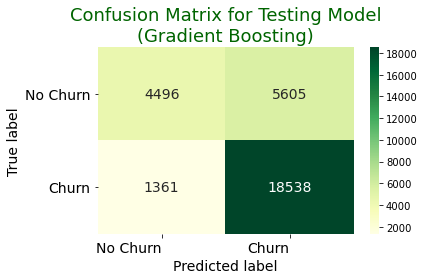

In [48]:
#Plot and Visualization Confusion Matrix
heatmap = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGn', annot_kws={'size': 14}, fmt='d')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkgreen')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [49]:
#Accuracy, Precision, and Recall
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='micro'))
print('Recall:', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.7678
Precision: 0.7678
Recall: 0.7678


In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.2322